In [1]:
import pandas as pd
from tortreinador.utils.tools import check_outlier
from tortreinador.utils.plot import plot_line_2
from tortreinador.utils.preprocessing import load_data
from tortreinador.train import TorchTrainer
from Rock.Model.MLP import MLP_Attention
from Rock.Model.SelfAttention import torch_cov
from tortreinador.utils.View import init_weights, split_weights
from tortreinador.utils.plot import calculate_GMM
import torch
import torch.nn as nn
from tortreinador.utils.metrics import r2_score
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
import proplot as pplt
import joblib

from tortreinador.models.MDN import Mixture, NLLLoss, mdn


In [2]:
df_chunk_0 = pd.read_parquet("D:\\Resource\\rockyExoplanetV3\\data_chunk_0.parquet")
df_chunk_1 = pd.read_parquet("D:\\Resource\\rockyExoplanetV3\\data_chunk_1.parquet")

df_all = pd.concat([df_chunk_0, df_chunk_1])

In [3]:
input_parameters = [
    'WRF',
    'MRF',
    'CRF',
    'WMF',
    'CMF',
    'CPS',
    'CTP',
    'k2'
]

output_parameters = [
    'Mass',
    'Radius',
    'FeMg',
    'SiMg',
]

In [6]:
t_loader, v_loader, test_x, test_y, s_x, s_y = load_data(data=df_all, input_parameters=input_parameters,
                                                         output_parameters=output_parameters,
                                                         if_normal=True, if_shuffle=True, batch_size=512, feature_range=(0, 1))

In [7]:
model = mdn(len(input_parameters), len(output_parameters), 10, 512)
init_weights(model)
criterion = NLLLoss()
optimizer = torch.optim.Adam(split_weights(model), lr=0.0001984, weight_decay=0.0001)

In [6]:
# class Trainer(TorchTrainer):
#     def calculate(self, x, y, mode='t'):
#         output, weight = model(x)
# 
#         loss = self.criterion(output, y)
# 
#         metric_per = r2_score(y, output)
# 
#         return self._standard_return(loss=loss, metric_per=metric_per, mode=mode, y=y, y_pred=output)

In [8]:
trainer = TorchTrainer(is_gpu=True, epoch=150, optimizer=optimizer, model=model, criterion=criterion)


Epoch:150, is GPU: True


In [9]:
config = {
    'b_m': 0.8,
    'm_p': 'D:\\Resource\\MDN\\MLPSelfAttention\\ForwardModeling\\',
    'w_e': 5,
    # 'l_m': {
    #     's_l': [43, 50, 74, 134, 148, 157, 166, 180],
    #     'gamma': 0.7
    # }
}

In [10]:
result = trainer.fit(t_loader, v_loader, **config)

module.root_layer.0.weight : torch.Size([512, 8])
module.root_layer.0.bias : torch.Size([512])
module.root_layer.2.weight : torch.Size([512, 512])
module.root_layer.2.bias : torch.Size([512])
module.root_layer.4.weight : torch.Size([512, 512])
module.root_layer.4.bias : torch.Size([512])
module.pi.0.weight : torch.Size([512, 512])
module.pi.0.bias : torch.Size([512])
module.pi.2.weight : torch.Size([10, 512])
module.pi.2.bias : torch.Size([10])
module.mu.0.weight : torch.Size([512, 512])
module.mu.0.bias : torch.Size([512])
module.mu.2.weight : torch.Size([40, 512])
module.mu.2.bias : torch.Size([40])
module.sigma.0.weight : torch.Size([512, 512])
module.sigma.0.bias : torch.Size([512])
module.sigma.2.weight : torch.Size([40, 512])
module.sigma.2.bias : torch.Size([40])


  0%|          | 0/5513 [00:00<?, ?batch/s]E:\anaconda\envs\deeplearning\lib\site-packages\torch\optim\lr_scheduler.py:136: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  "https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate", UserWarning)
Epoch 34 Validating: 100%|██████████| 690/690 [00:07<00:00, 93.59batch/s, loss=-14.0796, loss_avg=-13.8952, val_metric=0.8031] 


Save Best model: Metric:0.8031, Loss Avg:-13.8952


Epoch 36 Validating: 100%|██████████| 690/690 [00:09<00:00, 71.13batch/s, loss=-20.1747, loss_avg=-19.7513, val_metric=0.8239]


Save Best model: Metric:0.8239, Loss Avg:-19.7513


Epoch 39 Validating: 100%|██████████| 690/690 [00:10<00:00, 67.26batch/s, loss=-20.5951, loss_avg=-20.0699, val_metric=0.8316] 


Save Best model: Metric:0.8316, Loss Avg:-20.0699


Epoch 42 Validating: 100%|██████████| 690/690 [00:07<00:00, 88.57batch/s, loss=-20.3038, loss_avg=-19.7855, val_metric=0.8336] 


Save Best model: Metric:0.8336, Loss Avg:-19.7855


Epoch 44 Validating: 100%|██████████| 690/690 [00:07<00:00, 94.21batch/s, loss=-20.5035, loss_avg=-20.2327, val_metric=0.8504] 


Save Best model: Metric:0.8504, Loss Avg:-20.2327


Epoch 46 Validating: 100%|██████████| 690/690 [00:07<00:00, 93.74batch/s, loss=-20.1243, loss_avg=-19.6330, val_metric=0.8537] 


Save Best model: Metric:0.8537, Loss Avg:-19.6330


Epoch 51 Validating: 100%|██████████| 690/690 [00:07<00:00, 87.64batch/s, loss=-19.4731, loss_avg=-19.3610, val_metric=0.8635] 


Save Best model: Metric:0.8635, Loss Avg:-19.3610


Epoch 54 Validating: 100%|██████████| 690/690 [00:07<00:00, 94.27batch/s, loss=-20.2621, loss_avg=-19.9399, val_metric=0.8689] 


Save Best model: Metric:0.8689, Loss Avg:-19.9399


Epoch 61 Validating: 100%|██████████| 690/690 [00:07<00:00, 94.28batch/s, loss=-20.4184, loss_avg=-20.1281, val_metric=0.8708] 


Save Best model: Metric:0.8708, Loss Avg:-20.1281


Epoch 62 Validating: 100%|██████████| 690/690 [00:07<00:00, 93.44batch/s, loss=-21.2273, loss_avg=-20.8459, val_metric=0.8749] 


Save Best model: Metric:0.8749, Loss Avg:-20.8459


Epoch 63 Validating: 100%|██████████| 690/690 [00:07<00:00, 92.99batch/s, loss=-21.4062, loss_avg=-20.8381, val_metric=0.8807] 


Save Best model: Metric:0.8807, Loss Avg:-20.8381


Epoch 64 Validating: 100%|██████████| 690/690 [00:07<00:00, 93.31batch/s, loss=-21.7109, loss_avg=-21.0804, val_metric=0.8828] 


Save Best model: Metric:0.8828, Loss Avg:-21.0804


Epoch 65 Validating: 100%|██████████| 690/690 [00:07<00:00, 91.15batch/s, loss=-20.4774, loss_avg=-20.3249, val_metric=0.8833] 


Save Best model: Metric:0.8833, Loss Avg:-20.3249


Epoch 66 Validating: 100%|██████████| 690/690 [00:07<00:00, 89.82batch/s, loss=-17.9594, loss_avg=-17.5840, val_metric=0.8883] 


Save Best model: Metric:0.8883, Loss Avg:-17.5840


Epoch 70 Validating: 100%|██████████| 690/690 [00:07<00:00, 93.49batch/s, loss=-20.3587, loss_avg=-19.7063, val_metric=0.8951] 


Save Best model: Metric:0.8951, Loss Avg:-19.7063


Epoch 78 Validating: 100%|██████████| 690/690 [00:07<00:00, 92.99batch/s, loss=-17.5675, loss_avg=-17.6821, val_metric=0.8953] 


Save Best model: Metric:0.8953, Loss Avg:-17.6821


Epoch 85 Validating: 100%|██████████| 690/690 [00:07<00:00, 91.95batch/s, loss=-21.6618, loss_avg=-21.2415, val_metric=0.8957] 


Save Best model: Metric:0.8957, Loss Avg:-21.2415


Epoch 91 Validating: 100%|██████████| 690/690 [00:07<00:00, 93.01batch/s, loss=-21.6614, loss_avg=-21.1004, val_metric=0.8987] 


Save Best model: Metric:0.8987, Loss Avg:-21.1004


Epoch 93 Validating: 100%|██████████| 690/690 [00:07<00:00, 91.86batch/s, loss=-20.6666, loss_avg=-20.4020, val_metric=0.9071] 


Save Best model: Metric:0.9071, Loss Avg:-20.4020


Epoch 97 Validating: 100%|██████████| 690/690 [00:07<00:00, 89.15batch/s, loss=-21.6660, loss_avg=-21.3330, val_metric=0.9074] 


Save Best model: Metric:0.9074, Loss Avg:-21.3330


Epoch 100 Validating: 100%|██████████| 690/690 [00:07<00:00, 92.82batch/s, loss=-21.5569, loss_avg=-21.0877, val_metric=0.9148] 


Save Best model: Metric:0.9148, Loss Avg:-21.0877


Epoch 113 Validating: 100%|██████████| 690/690 [00:07<00:00, 93.40batch/s, loss=-21.9125, loss_avg=-21.5303, val_metric=0.9209] 


Save Best model: Metric:0.9209, Loss Avg:-21.5303


Epoch 122 Validating: 100%|██████████| 690/690 [00:07<00:00, 90.85batch/s, loss=-21.7803, loss_avg=-21.2391, val_metric=0.9231] 


Save Best model: Metric:0.9231, Loss Avg:-21.2391


Epoch 125 Validating: 100%|██████████| 690/690 [00:07<00:00, 90.24batch/s, loss=-21.5079, loss_avg=-21.1852, val_metric=0.9241] 


Save Best model: Metric:0.9241, Loss Avg:-21.1852


Epoch 137 Validating: 100%|██████████| 690/690 [00:07<00:00, 86.57batch/s, loss=-21.5206, loss_avg=-20.8886, val_metric=0.9252] 


Save Best model: Metric:0.9252, Loss Avg:-20.8886


Epoch 141 Validating: 100%|██████████| 690/690 [00:07<00:00, 86.26batch/s, loss=-22.2035, loss_avg=-21.8073, val_metric=0.9261] 


Save Best model: Metric:0.9261, Loss Avg:-21.8073


Epoch 143 Validating: 100%|██████████| 690/690 [00:08<00:00, 85.16batch/s, loss=-21.2705, loss_avg=-20.7303, val_metric=0.9289] 


Save Best model: Metric:0.9289, Loss Avg:-20.7303


Epoch 145 Validating: 100%|██████████| 690/690 [00:07<00:00, 88.04batch/s, loss=-22.3995, loss_avg=-22.0313, val_metric=0.9292] 


Save Best model: Metric:0.9292, Loss Avg:-22.0313


Epoch 146 Validating: 100%|██████████| 690/690 [00:07<00:00, 87.83batch/s, loss=-22.6011, loss_avg=-22.1208, val_metric=0.9308] 


Save Best model: Metric:0.9308, Loss Avg:-22.1208


Epoch 147 Validating: 100%|██████████| 690/690 [00:12<00:00, 55.72batch/s, loss=-22.6360, loss_avg=-22.3691, val_metric=0.9318]


Save Best model: Metric:0.9318, Loss Avg:-22.3691


Epoch 150 Validating: 100%|██████████| 690/690 [00:09<00:00, 69.67batch/s, loss=-22.1959, loss_avg=-22.0678, val_metric=0.9237]


In [27]:
# output = y_pred[0].detach().cpu().numpy()

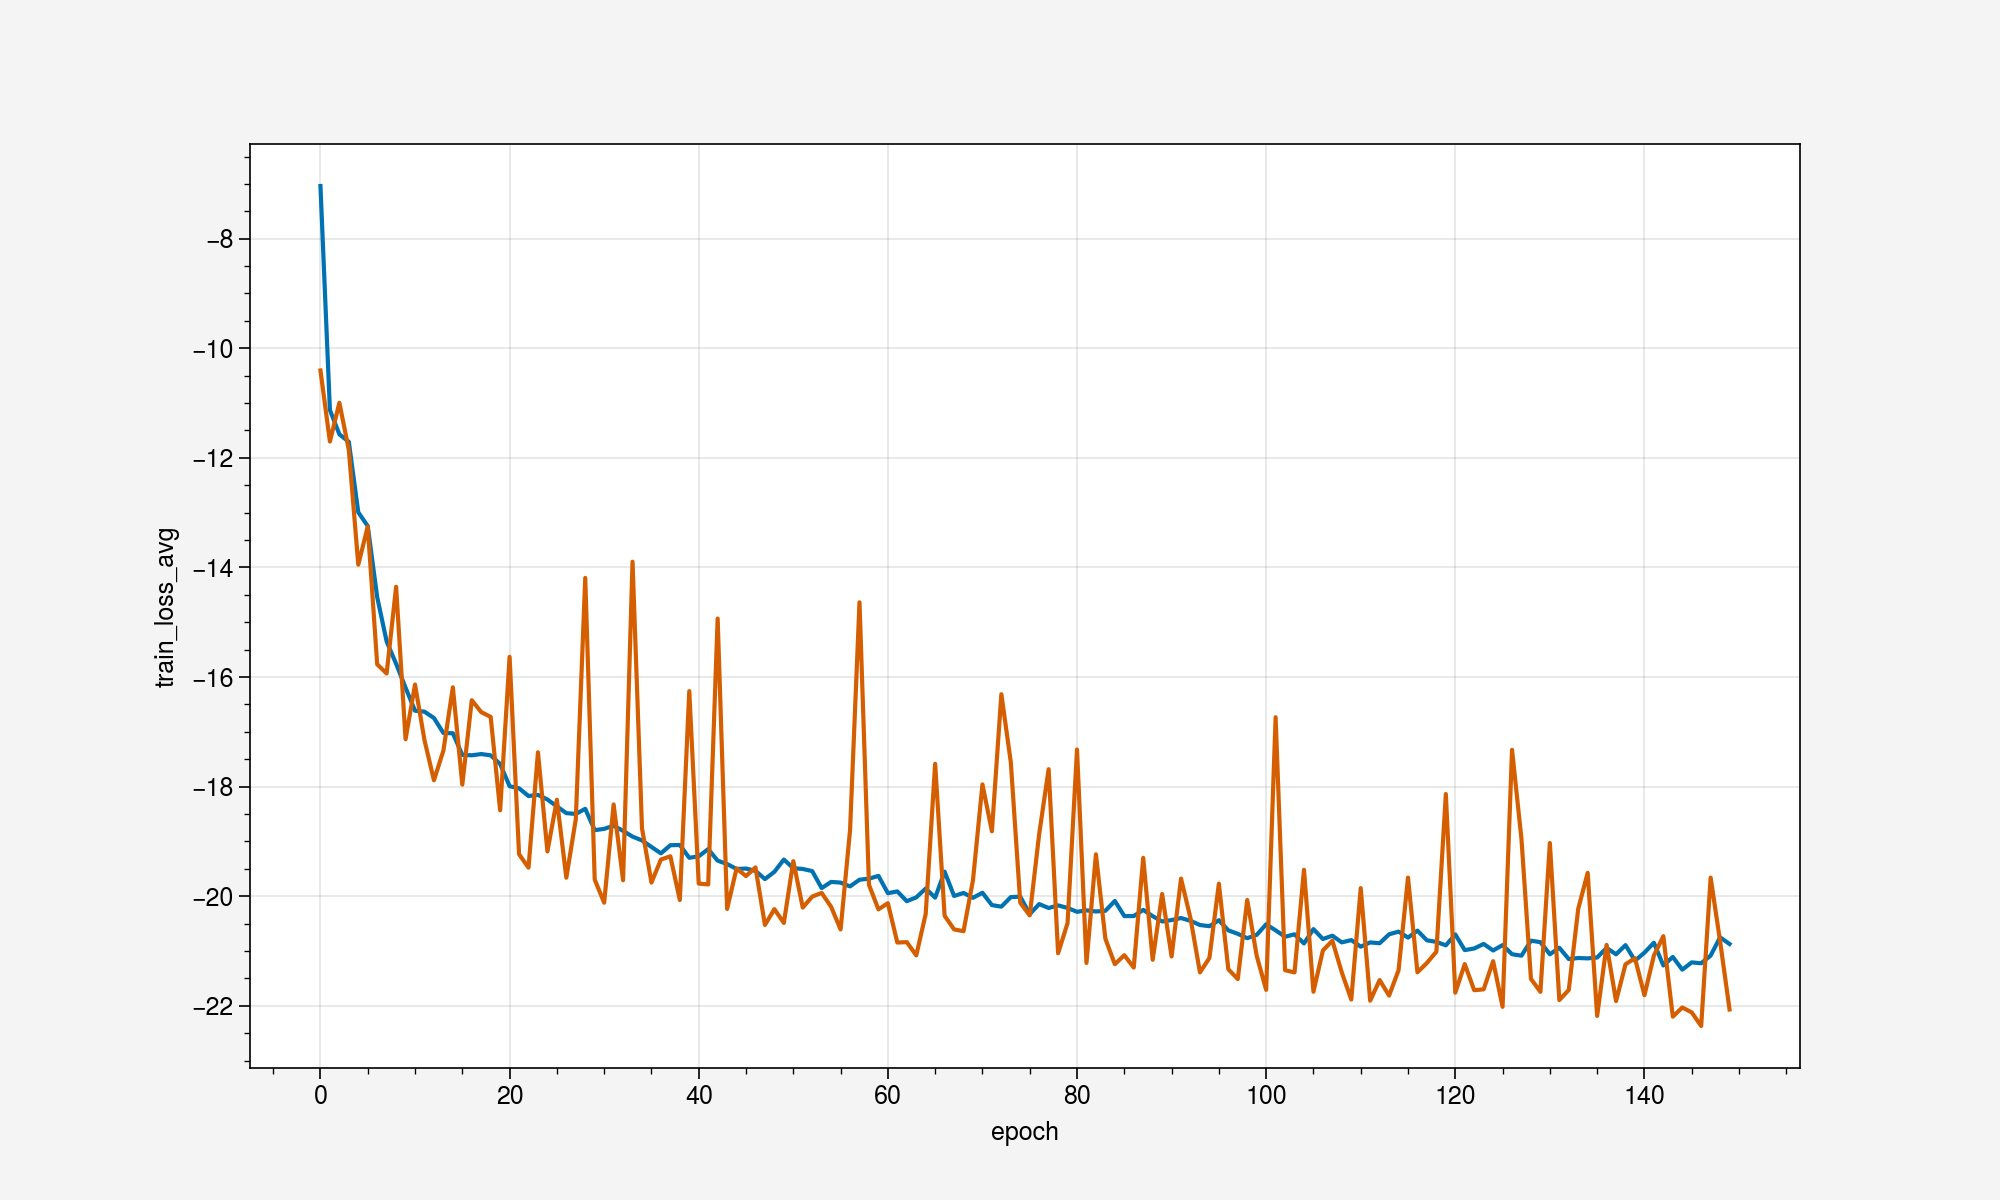

In [11]:
result_pd = pd.DataFrame()
result_pd['epoch'] = range(150)
result_pd['train_loss_avg'] = result[0].val.detach().cpu().numpy()
result_pd['validation_loss_avg'] = result[1].val.detach().cpu().numpy()

plot_line_2(y_1='train_loss_avg', y_2='validation_loss_avg', df=result_pd, fig_size=(10, 6), output_path=".\\imgs\\ForwardModeling_MDN20240715_TrainValLoss.png", dpi=300)

In [15]:
check_outlier(result[1].val.detach().cpu().numpy(), 1, 15, 2.5)

[33, 42, 57, 80, 101, 119, 126]

In [16]:
np.save('D:\\Resource\\MDN\MLPSelfAttention\\ForwardModeling\\TestData\\test_x.npy', test_x)
np.save('D:\\Resource\\MDN\MLPSelfAttention\\ForwardModeling\\TestData\\test_y.npy', test_y)
joblib.dump(s_x, "D:\\Resource\\MDN\MLPSelfAttention\\ForwardModeling\\TestData\\ForwardModeling_Xscaler_20240715.save")
joblib.dump(s_y, "D:\\Resource\\MDN\MLPSelfAttention\\ForwardModeling\\TestData\\ForwardModeling_20240715.save")

['D:\\Resource\\MDN\\MLPSelfAttention\\ForwardModeling\\TestData\\ForwardModeling_20240715.save']

In [4]:
model = mdn(len(input_parameters), len(output_parameters), 10, 512)
init_weights(model)
model = nn.DataParallel(model)
model.load_state_dict(torch.load("D:\\Resource\\MDN\\MLPSelfAttention\\ForwardModeling\\best_model.pth"))

<All keys matched successfully>

In [5]:
t_x = np.load("D:\\Resource\\MDN\\rockyExoplanetV3\\NoiseADD\\testData\\test_x.npy")
t_y = np.load("D:\\Resource\\MDN\\rockyExoplanetV3\\NoiseADD\\testData\\test_y.npy")
m_y = joblib.load("D:\\Resource\\MDN\\rockyExoplanetV3\\NoiseADD\\testData\\MDN_v3_yscaler_20240630.save")

In [6]:
idx_select = np.random.choice(range(0, len(t_x)), 20000)

In [8]:
test_x_sub = t_x[idx_select, :]
test_y_sub = t_y[idx_select, :]

In [10]:
model.eval()
pred = model(torch.from_numpy(test_x_sub))

In [11]:
mixture = Mixture()

In [12]:
pdf = mixture(pred[0], pred[1], pred[2])

In [13]:
y_range = torch.linspace(-2, 2, 20000).reshape(-1, 1)

In [17]:
pdf_values = torch.exp(pdf.log_prob(y_range.to('cuda'))).detach().cpu().numpy()

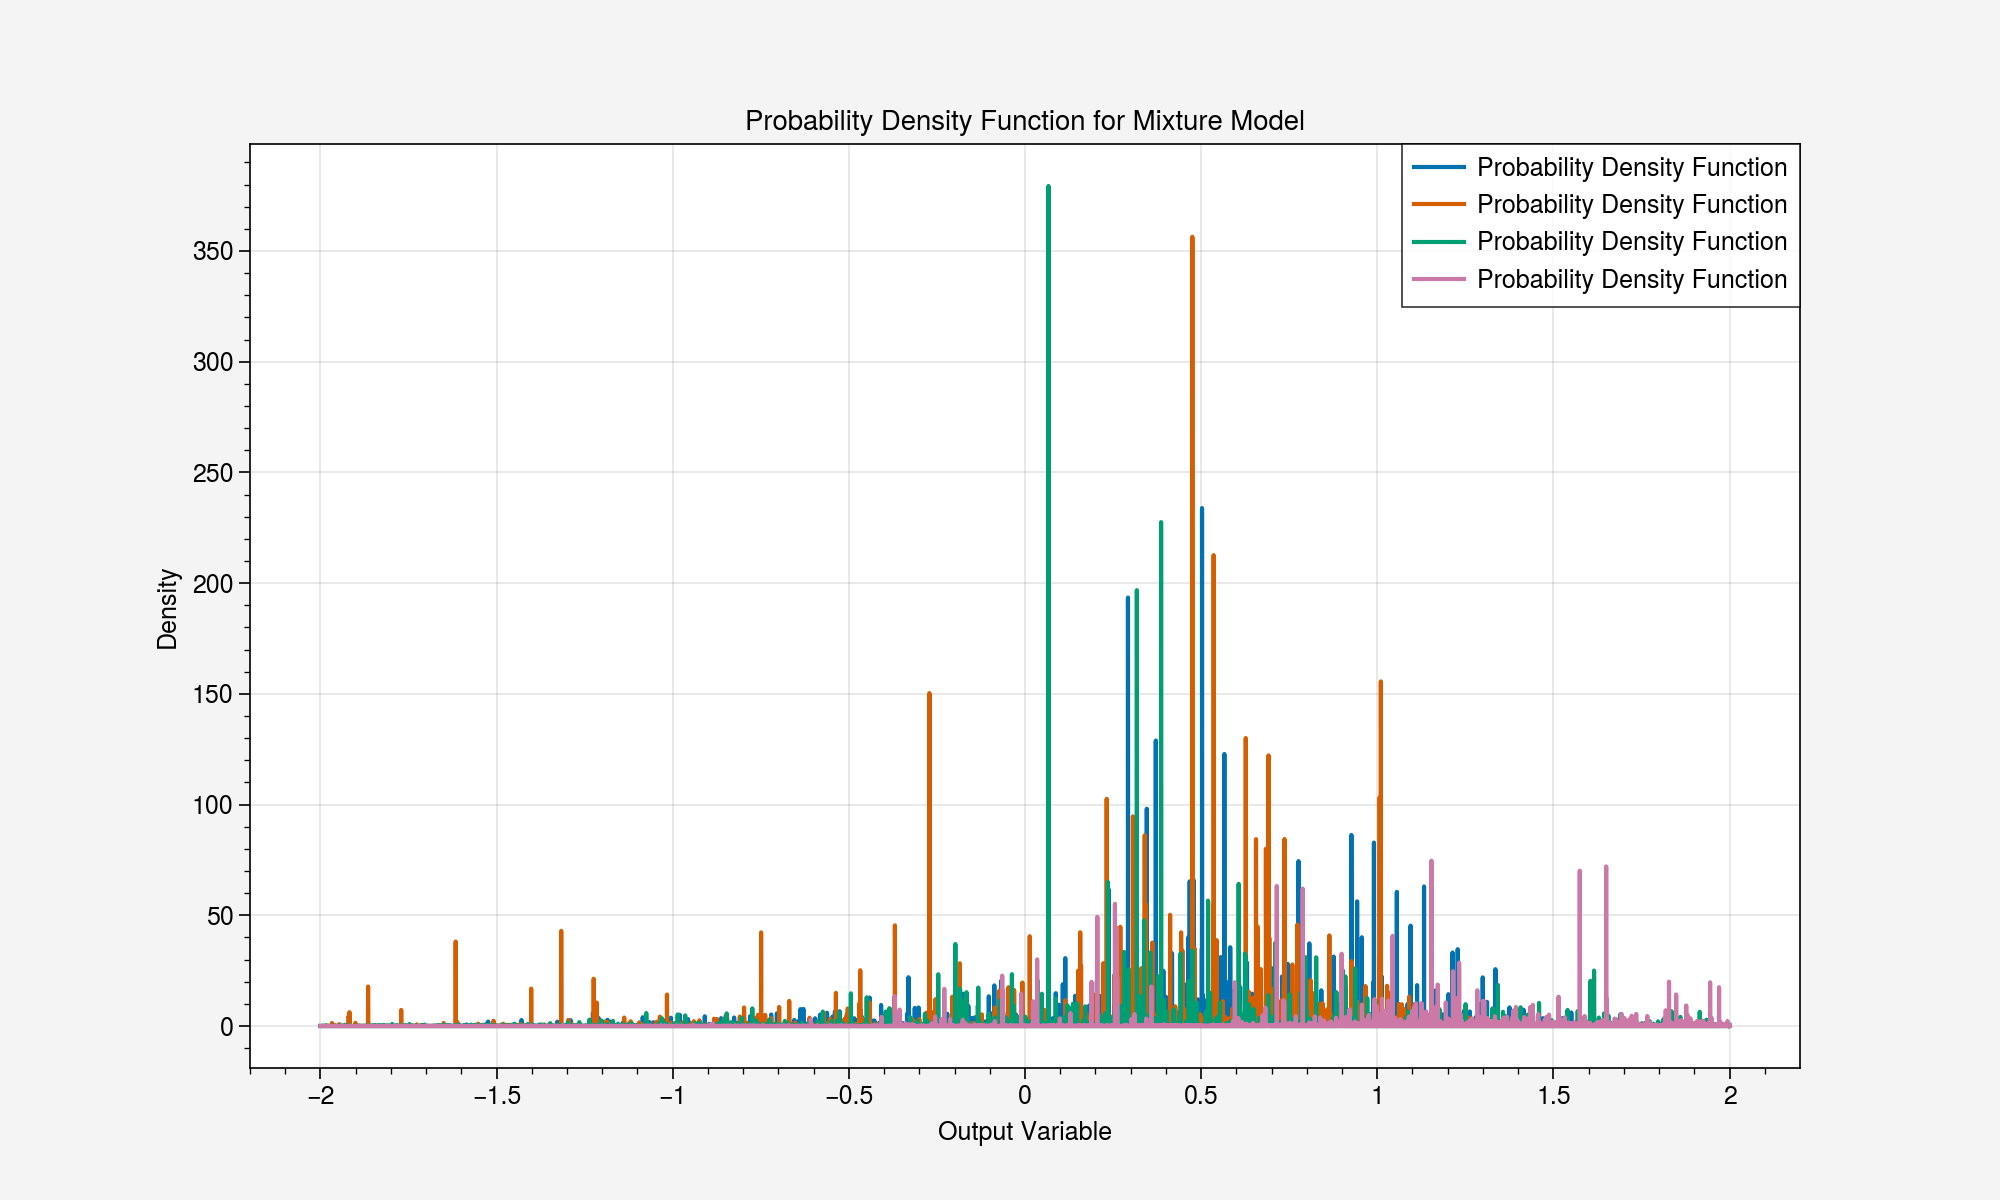

In [18]:
plt.figure(figsize=(10, 6))
plt.plot(y_range.numpy(), pdf_values, label='Probability Density Function')
plt.xlabel('Output Variable')
plt.ylabel('Density')
plt.title('Probability Density Function for Mixture Model')
plt.legend()
plt.show()